In [245]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [246]:
#Reading in the data

xls = pd.ExcelFile("ml_data_final.xlsx")

df_train = pd.read_excel(xls, "Sheet1")
df_train_og = pd.read_excel(xls, "Sheet1")

In [247]:
df_train.head()


,Product_name,Product_url,Category,Avg_review,No_of_reviews,Price,Brand,Average_sales_month
0,Lymio Women's Regular Top,https://www.amazon.in/Lymio-Womens-Regular-Top...,Clothing and accessories,4.4,197.0,379.0,Lymio,500
1,Lymio Women's Regular Color Chocker Neck Half ...,https://www.amazon.in/Lymio-Womens-Regular-Top...,Clothing and accessories,4.1,482.0,369.0,Lymio,436
2,Women Printed Slub Rayon Top with Half Sleeves,https://www.amazon.in/DHRUVI-TRENDZ-Printed-Sl...,Clothing and accessories,3.6,648.0,349.0,DHRUVI TRENDZ,321
3,Butterfly Tops for Women Stylish,https://www.amazon.in/Bhumi-fashion-Butterfly-...,Clothing and accessories,2.0,3.0,459.0,Bhumi fashion,284
4,Women's Diva Slub Regular Fit Dyed Top,https://www.amazon.in/SIRIL-WomenS-Rayon-117TK...,Clothing and accessories,3.8,367.0,359.0,SIRIL,251


In [248]:
for i in range(df_train.shape[0]):
    df_train['Category'][i] = df_train['Category'][i].lower()
    df_train['Brand'][i] = df_train['Brand'][i].lower()

<ipython-input-248-639555bb9e89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Category'][i] = df_train['Category'][i].lower()
<ipython-input-248-639555bb9e89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Brand'][i] = df_train['Brand'][i].lower()


In [249]:
df_train.head()

,Product_name,Product_url,Category,Avg_review,No_of_reviews,Price,Brand,Average_sales_month
0,Lymio Women's Regular Top,https://www.amazon.in/Lymio-Womens-Regular-Top...,clothing and accessories,4.4,197.0,379.0,lymio,500
1,Lymio Women's Regular Color Chocker Neck Half ...,https://www.amazon.in/Lymio-Womens-Regular-Top...,clothing and accessories,4.1,482.0,369.0,lymio,436
2,Women Printed Slub Rayon Top with Half Sleeves,https://www.amazon.in/DHRUVI-TRENDZ-Printed-Sl...,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321
3,Butterfly Tops for Women Stylish,https://www.amazon.in/Bhumi-fashion-Butterfly-...,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284
4,Women's Diva Slub Regular Fit Dyed Top,https://www.amazon.in/SIRIL-WomenS-Rayon-117TK...,clothing and accessories,3.8,367.0,359.0,siril,251


In [250]:
df_train.isnull().sum()


Product_name           0
Product_url            0
Category               0
Avg_review             0
No_of_reviews          0
Price                  0
Brand                  0
Average_sales_month    0
dtype: int64

In [251]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_name         1501 non-null   object 
 1   Product_url          1501 non-null   object 
 2   Category             1501 non-null   object 
 3   Avg_review           1501 non-null   float64
 4   No_of_reviews        1501 non-null   float64
 5   Price                1501 non-null   float64
 6   Brand                1501 non-null   object 
 7   Average_sales_month  1501 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 93.9+ KB


In [252]:
df_train.describe()

,Avg_review,No_of_reviews,Price,Average_sales_month
count,1501.000000,1501.000000,1501.000000,1501.000000
mean,4.058361,11312.517322,4230.505330,702.013324
std,0.471146,34765.415938,11855.146388,1066.252901
min,1.000000,1.000000,10.000000,0.000000
25%,3.900000,167.000000,399.000000,36.000000
50%,4.100000,786.000000,690.000000,199.000000
75%,4.400000,6595.000000,1565.000000,949.000000
max,5.000000,396978.000000,134990.000000,8345.000000


In [253]:
df_train.drop(['Product_name','Product_url'],axis=1,inplace=True)
#Taking of the columns which are of no use

In [254]:
df_train

,Category,Avg_review,No_of_reviews,Price,Brand,Average_sales_month
0,clothing and accessories,4.4,197.0,379.0,lymio,500
1,clothing and accessories,4.1,482.0,369.0,lymio,436
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284
4,clothing and accessories,3.8,367.0,359.0,siril,251
...,...,...,...,...,...,...
1496,electronics,4.3,5904.0,1399.0,redmi,1504
1497,electronics,4.3,79833.0,999.0,redmi,2469
1498,electronics,4.3,79833.0,1699.0,redmi,3339
1499,electronics,4.2,86791.0,7999.0,redmi,2320


## Data cleaning using KLib Library

In [255]:
import klib

In [256]:
klib.missingval_plot(df_train)

No missing values found in the dataset.


In [257]:
df_train = klib.data_cleaning(df_train)

Shape of cleaned data: (1405, 6)Remaining NAs: 0

Changes:
Dropped rows: 96
     of which 96 duplicates. (Rows: [151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 194, 195, 199, 255, 478, 502, 504, 505, 506, 1164, 1360, 1372, 1399, 1428, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.04 MB (-57.14%)



In [258]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called 

,category,avg_review,no_of_reviews,price,brand,average_sales_month
0,clothing and accessories,4.4,197.0,379.0,lymio,500
1,clothing and accessories,4.1,482.0,369.0,lymio,436
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284
4,clothing and accessories,3.8,367.0,359.0,siril,251
...,...,...,...,...,...,...
1400,electronics,4.3,6510.0,549.0,redgear,951
1401,electronics,4.6,6532.0,1495.0,logitech,449
1402,electronics,4.6,4123.0,1482.0,logitech,411
1403,electronics,4.2,28964.0,229.0,redmi,1296


In [259]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category             1405 non-null   category
 1   avg_review           1405 non-null   float32 
 2   no_of_reviews        1405 non-null   float32 
 3   price                1405 non-null   float32 
 4   brand                1405 non-null   string  
 5   average_sales_month  1405 non-null   int16   
dtypes: category(1), float32(3), int16(1), string(1)
memory usage: 31.8 KB


In [260]:
df_train = klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category             1405 non-null   category
 1   avg_review           1405 non-null   Float32 
 2   no_of_reviews        1405 non-null   Float32 
 3   price                1405 non-null   Float32 
 4   brand                1405 non-null   string  
 5   average_sales_month  1405 non-null   int16   
dtypes: Float32(3), category(1), int16(1), string(1)
memory usage: 35.9 KB


In [261]:
klib.mv_col_handling(df_train)

,category,avg_review,no_of_reviews,price,brand,average_sales_month
0,clothing and accessories,4.4,197.0,379.0,lymio,500
1,clothing and accessories,4.1,482.0,369.0,lymio,436
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284
4,clothing and accessories,3.8,367.0,359.0,siril,251
...,...,...,...,...,...,...
1400,electronics,4.3,6510.0,549.0,redgear,951
1401,electronics,4.6,6532.0,1495.0,logitech,449
1402,electronics,4.6,4123.0,1482.0,logitech,411
1403,electronics,4.2,28964.0,229.0,redmi,1296


## Pre-processing before model building

### Label encoding

In [262]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [263]:
df_train['category_le']= le.fit_transform(df_train['category'])
df_train['brand_le']= le.fit_transform(df_train['brand'])

In [264]:
df_train

,category,avg_review,no_of_reviews,price,brand,average_sales_month,category_le,brand_le
0,clothing and accessories,4.4,197.0,379.0,lymio,500,0,221
1,clothing and accessories,4.1,482.0,369.0,lymio,436,0,221
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321,0,93
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284,0,47
4,clothing and accessories,3.8,367.0,359.0,siril,251,0,343
...,...,...,...,...,...,...,...,...
1400,electronics,4.3,6510.0,549.0,redgear,951,1,315
1401,electronics,4.6,6532.0,1495.0,logitech,449,1,218
1402,electronics,4.6,4123.0,1482.0,logitech,411,1,218
1403,electronics,4.2,28964.0,229.0,redmi,1296,1,316


In [265]:
X=df_train.drop('average_sales_month',axis=1)


In [266]:
X = X.drop('category', axis = 1)


In [267]:
X = X.drop('brand', axis = 1)

In [268]:
X

,avg_review,no_of_reviews,price,category_le,brand_le
0,4.4,197.0,379.0,0,221
1,4.1,482.0,369.0,0,221
2,3.6,648.0,349.0,0,93
3,2.0,3.0,459.0,0,47
4,3.8,367.0,359.0,0,343
...,...,...,...,...,...
1400,4.3,6510.0,549.0,1,315
1401,4.6,6532.0,1495.0,1,218
1402,4.6,4123.0,1482.0,1,218
1403,4.2,28964.0,229.0,1,316


In [269]:
Y = df_train['average_sales_month']

In [270]:
Y

0        500
1        436
2        321
3        284
4        251
        ... 
1400     951
1401     449
1402     411
1403    1296
1404    1279
Name: average_sales_month, Length: 1405, dtype: int16

### Splitting data into training and testing

In [271]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 101, test_size = 0.2)

In [272]:
X_train

,avg_review,no_of_reviews,price,category_le,brand_le
1088,4.3,118593.0,1990.0,1,268
126,4.3,18.0,1097.0,0,400
567,1.0,4.0,649.0,2,219
63,2.7,15.0,1119.0,0,406
137,4.0,82.0,519.0,0,400
...,...,...,...,...,...
973,3.6,1207.0,2199.0,1,324
75,4.0,24.0,360.0,0,212
599,4.5,13476.0,311.0,2,215
1361,3.7,9256.0,1299.0,1,62


## Standardization

In [273]:
X.describe()

,avg_review,no_of_reviews,price,category_le,brand_le
count,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000
mean,4.055800,11115.551758,3964.181885,1.019217,231.662633
std,0.469546,35014.593750,11107.629883,0.828826,122.015488
min,1.000000,1.000000,10.000000,0.000000,0.000000
25%,3.900000,178.000000,380.000000,0.000000,125.000000
50%,4.100000,754.000000,675.000000,1.000000,236.000000
75%,4.400000,6227.000000,1499.000000,2.000000,325.000000
max,5.000000,396978.000000,134990.000000,2.000000,426.000000


In [274]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [275]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [276]:
#X_train_std

In [277]:
#Y_test.shape

In [278]:
#Y_test_2d = np.reshape(Y_test, (len(Y_test) ,1))
#Y_test_2d

In [279]:
#Y_train_std = sc.fit_transform(Y_train)
#Y_test_std = sc.fit_transform(Y_test)

## Building linear regression predictor using pytorch

In [280]:
model = nn.Linear(5, 1, bias = True)

In [281]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [282]:
#Converting dataframe to numpy array
#X_train_arr = X_train.to_numpy(dtype = np.float32)
#X_test_arr = X_test.to_numpy(dtype = np.float32)
Y_train_arr = Y_train.to_numpy(dtype = np.float32)
Y_test_arr = Y_test.to_numpy(dtype = np.float32)

In [283]:
Y_train_2d = np.reshape(Y_train_arr, (Y_train_arr.shape[0], 1) )
Y_test_2d = np.reshape(Y_test_arr, (Y_test_arr.shape[0], 1))
#Y_test_2d

In [284]:
#Normalizing the output
Y_train_std = sc.fit_transform(Y_train_2d)
Y_test_std = sc.fit_transform(Y_test_2d)

In [285]:
#Y_train_std = np.reshape(Y_train_std, Y_train.shape)
#Y_test_std = np.reshape(Y_test_std, Y_test_arr.shape)


In [286]:
inputs = torch.from_numpy(X_train_std.astype(np.float32))
targets = torch.from_numpy(Y_train_std.astype(np.float32))

In [287]:
inputs

tensor([[ 0.5072,  3.0252, -0.1839, -0.0216,  0.2944],
        [ 0.5072, -0.3071, -0.2614, -1.2332,  1.3771],
        [-6.5074, -0.3075, -0.3003,  1.1901, -0.1075],
        ...,
        [ 0.9323,  0.0711, -0.3296,  1.1901, -0.1403],
        [-0.7682, -0.0475, -0.2439, -0.0216, -1.3953],
        [ 0.5072, -0.2837, -0.3151,  1.1901, -0.3864]])

In [288]:
targets

tensor([[ 3.2078],
        [-0.6529],
        [-0.6519],
        ...,
        [ 1.0463],
        [ 0.2726],
        [ 1.7398]])

### Training the model

In [289]:
no_of_epochs = 250
losses = []

for i in range(no_of_epochs):
    #Zero the parameter gradients
    optimizer.zero_grad()

    #Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    #Record the losses
    losses.append(loss.item())

    #Backward and optimize
    loss.backward()
    optimizer.step()

    print(f"Epoch {i + 1}/{no_of_epochs} : Loss = {loss.item():.4f}")


Epoch 1/250 : Loss = 1.9026
Epoch 2/250 : Loss = 1.8607
Epoch 3/250 : Loss = 1.8203
Epoch 4/250 : Loss = 1.7814
Epoch 5/250 : Loss = 1.7439
Epoch 6/250 : Loss = 1.7078
Epoch 7/250 : Loss = 1.6730
Epoch 8/250 : Loss = 1.6395
Epoch 9/250 : Loss = 1.6073
Epoch 10/250 : Loss = 1.5762
Epoch 11/250 : Loss = 1.5462
Epoch 12/250 : Loss = 1.5174
Epoch 13/250 : Loss = 1.4895
Epoch 14/250 : Loss = 1.4627
Epoch 15/250 : Loss = 1.4369
Epoch 16/250 : Loss = 1.4120
Epoch 17/250 : Loss = 1.3880
Epoch 18/250 : Loss = 1.3649
Epoch 19/250 : Loss = 1.3426
Epoch 20/250 : Loss = 1.3211
Epoch 21/250 : Loss = 1.3003
Epoch 22/250 : Loss = 1.2804
Epoch 23/250 : Loss = 1.2611
Epoch 24/250 : Loss = 1.2425
Epoch 25/250 : Loss = 1.2246
Epoch 26/250 : Loss = 1.2073
Epoch 27/250 : Loss = 1.1907
Epoch 28/250 : Loss = 1.1746
Epoch 29/250 : Loss = 1.1591
Epoch 30/250 : Loss = 1.1441
Epoch 31/250 : Loss = 1.1297
Epoch 32/250 : Loss = 1.1158
Epoch 33/250 : Loss = 1.1024
Epoch 34/250 : Loss = 1.0894
Epoch 35/250 : Loss = 1

Text(0.5, 1.0, 'for 1000 epochs, lr = 0.01')

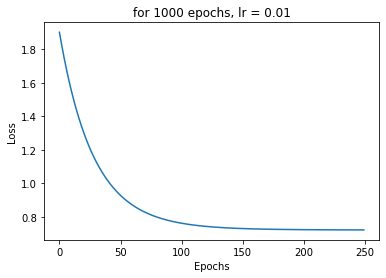

In [290]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("for 1000 epochs, lr = 0.01")

In [291]:
torch.save(model, 'models\\dl.pth')

In [292]:
weights = model.weight.data.numpy()
print("Weights : ",weights)

Weights :  [[ 0.06943946  0.41431746 -0.00942353  0.27360916  0.02958249]]


In [293]:
bias = model.bias.data.numpy()
print("Bias : ",bias)

Bias :  [0.00268974]


In [294]:
output = model(inputs[0])

In [295]:
output

tensor([1.2958], grad_fn=<AddBackward0>)

In [296]:
def denormalize(output):
    x = output * np.std(Y_train) + np.mean(Y_train)
    return x

#def normalize(in):
#    x_n = in - 

In [297]:
X_test_t = torch.from_numpy(X_test_std.astype(np.float32))
output_test = model(X_test_t)

In [298]:
output_test
outputs = []
for i in range(len(output_test)):
    outputs.append(denormalize(output_test[i].item()))

In [299]:
outputs

[726.0533550041328,
 949.1915790090203,
 791.4685242256812,
 89.4008360076208,
 589.6712680487557,
 821.2321400806505,
 -178.53887669295023,
 986.8572888274482,
 1002.9972574488081,
 207.1900165096976,
 725.2275506662781,
 184.4784346588837,
 731.4112665492016,
 233.87334177769299,
 825.4298224738017,
 1827.5827821041298,
 902.358392159078,
 66.26292222383631,
 215.58741511656916,
 895.138698923675,
 1092.66048677454,
 47.36971523000204,
 897.8299828074443,
 477.7584268883376,
 358.0702896915438,
 1493.244374599781,
 600.7131495547056,
 526.1268555211899,
 710.9549490379521,
 791.3221584794849,
 579.622253062309,
 1065.5197367712346,
 556.8692552289933,
 949.825021669963,
 149.9479208789346,
 962.7377792798154,
 873.1545314887437,
 216.96588323059672,
 1863.9158155868024,
 882.702240520325,
 1466.2521859444228,
 563.9395936182724,
 517.2832644153341,
 54.185972421570455,
 133.52642218604478,
 1235.4390665341034,
 446.6542998661016,
 163.7475167033847,
 236.021641792658,
 456.8548190772

In [300]:
Y_test

1040     227
1191    2469
1380     775
2        321
1131     127
        ... 
774      811
1043      26
1168     610
393       12
1067       3
Name: average_sales_month, Length: 281, dtype: int16

In [301]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [302]:
print('R2 score : ', r2_score(Y_test,outputs))
print('mean absolute error : ',mean_absolute_error(Y_test,outputs))
print('Mean squared error : ',np.sqrt(mean_squared_error(Y_test,outputs)))

R2 score :  0.29028607651992533
mean absolute error :  625.7416978413459
Mean squared error :  1012.1568503474055


## Testing model on real time

In [303]:
brands_health = []
brands_cloth = []
brands_electronics = []

In [304]:
for i in range(0, 469):
    brands_cloth.append((df_train['brand'][i]))

for i in range(469, 965):
    brands_health.append((df_train['brand'][i]))

for i in range(965, 1405):
    brands_electronics.append(df_train['brand'][i])

In [305]:
brands_cloth = list(set(brands_cloth))
brands_health = list(set(brands_health))
brands_electronics = list(set(brands_electronics))

In [306]:
cat_in_label = 1000
cat_in = input("Enter the name of the category : ").lower()
cat_in = cat_in.lower()

if cat_in == "electronics":
    print(f"The available brands in {cat_in} are : ", brands_electronics)
    for idx, i in enumerate(df_train_og['Category']):
        if i.lower() == cat_in:
            cat_in_label = X_train['category_le'][idx+1]
            break
elif cat_in == "clothing and accessories":
    print(f"The available brands in {cat_in} are : ", brands_cloth)
    for idx, i in enumerate(df_train_og['Category']):
        if i.lower() == cat_in:
            cat_in_label = X_train['category_le'][idx+1]
            break
elif cat_in == "health and personal care":
    print(f"The available brands in {cat_in} are :", brands_health)
    for idx, i in enumerate(df_train_og['Category']):
        if i.lower() == cat_in:
            cat_in_label = X_train['category_le'][idx+1]
            break
else :
    print(f"{cat_in} doesn't exist")


#print(cat_in_label)

The available brands in electronics are :  ['ptron', 'mivi', 'razer', 'philips', 'wecool', 'redmi', 'corsair', 'realme', 'asus', 'boat', 'honor', 'msi', 'acer', 'sony', 'jbl', 'logitech', 'tp-link', 'amazon', 'oneplus', 'redgear', 'hp', 'hyperx', 'sandisk', 'boult', 'zebronics', 'bose', 'dell', 'sennheiser', 'gionee', 'lenovo ', 'motorola', 'lenovo', 'saregama', 'vivo', 'samsung', 'noise', 'nokia', 'lg', 'oppo', 'lava']


In [307]:
brand_in = input("Choose one of the above brand : ")

if cat_in == 'electronics':
    if brand_in in brands_electronics :
        for idx, i in enumerate(df_train['brand']):
            brand_in_label = df_train['brand_le'][idx]
    else :
        print("The selected brand is not in our database!")

elif cat_in == "health and personal care":
    if brand_in in brands_health:
        for idx, i in enumerate(df_train['brand']):
            brand_in_label = df_train['brand_le'][idx]
    else :
        print("The selected brand in not in our database!")

elif cat_in == "clothing and accessories":
    if brand_in in brands_cloth:
        for idx, i in enumerate(df_train['brand']):
            brand_in_label = df_train['brand_le'][idx]
    else :
        print("The selected brand is not in our database!")

In [308]:
brand_in_label

88

In [309]:
avg_review_in = float(input("Enter the average review of the product : "))
avg_review_in_std = (avg_review_in - np.mean(df_train['avg_review'])) / np.std(df_train['avg_review'])


no_of_reviews_in = int(input("Enter the number of reviews in : "))
no_of_reviews_in_std = (no_of_reviews_in - np.mean(df_train['no_of_reviews'])) / np.std(df_train['no_of_reviews'])

price_in = float(input("Enter the price of the product : "))
price_in_std = (price_in - np.mean(df_train['price'])) / np.std(df_train['price'])

#cat_in_label, brand_in_label

cat_in_label_std = (cat_in_label - np.mean(df_train['category_le'])) / np.std(df_train['category_le'])

brand_in_label_std = (brand_in_label - np.mean(df_train['brand_le'])) / np.std(df_train['brand_le'])

inputs = np.array([[avg_review_in_std, no_of_reviews_in_std, price_in_std, cat_in_label_std, brand_in_label_std]], dtype = np.float32)

In [310]:
inputs_t = torch.from_numpy(inputs.astype(np.float32))

In [311]:
pred_output = model(inputs_t) 
pred_output = denormalize(pred_output)

In [312]:
print("The expected number of sales per month for this product is : {}".format(int(pred_output)))

The expected number of sales per month for this product is : 1067
